In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train, test = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
len(train)

2

In [4]:
train[0].shape

(60000, 28, 28)

In [5]:
train[0][0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
train[1].shape

(60000,)

In [7]:
train[1][0]

5

=========== 5 ===============


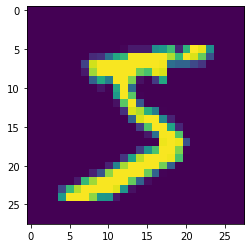

=========== 0 ===============


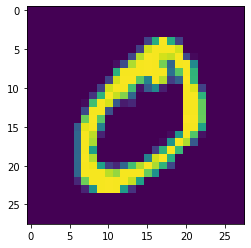

=========== 4 ===============


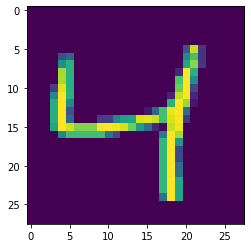

=========== 1 ===============


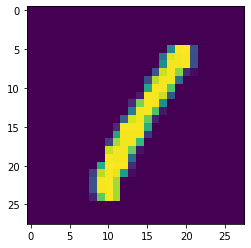

=========== 9 ===============


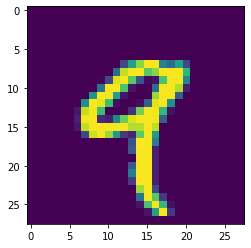

=========== 2 ===============


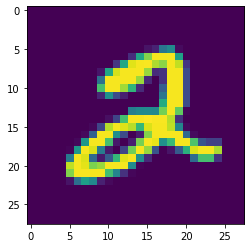

=========== 1 ===============


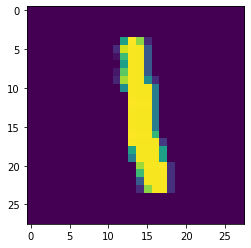

=========== 3 ===============


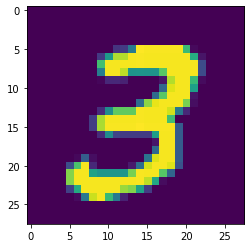

=========== 1 ===============


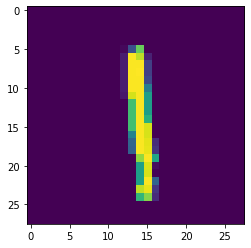

=========== 4 ===============


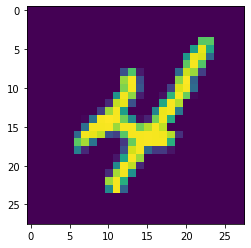

In [8]:
for i in range(10):
    print('===========', train[1][i], '===============')
    plt.imshow(train[0][i, ...])
    plt.show()

In [9]:
X_train = np.array(train[0])[..., None].astype(np.float32) / 255.

In [10]:
def process_input(keras_dataset):
    X = np.array(keras_dataset[0])[..., None].astype(np.float32) / 255.
    Y = np.array(keras_dataset[1]).astype(np.int64)[..., None]
    return X, Y

In [11]:
X_train, Y_train = process_input(train)

In [12]:
X_train.shape

(60000, 28, 28, 1)

In [13]:
X_train.dtype

dtype('float32')

In [14]:
Y_train.shape

(60000, 1)

In [15]:
Y_train.dtype

dtype('int64')

In [16]:
i =tf.keras.layers.Input(shape = [28,28,1], dtype = tf.float32, name = "X")

In [17]:
i

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'X')>

In [18]:
c1 = tf.keras.layers.Conv2D(filters = 8, kernel_size = (3,3), activation = "relu", strides = (1,1), padding = "valid")(i)

In [19]:
c1

<KerasTensor: shape=(None, 26, 26, 8) dtype=float32 (created by layer 'conv2d')>

In [20]:
c2 = tf.keras.layers.Conv2D(filters = 16, kernel_size = (3,3), activation = "relu", strides = (1,1), padding = "valid")(c1)

In [21]:
c2

<KerasTensor: shape=(None, 24, 24, 16) dtype=float32 (created by layer 'conv2d_1')>

In [22]:
c3 = tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = "relu", strides = (2,2), padding = "same")(c2)
#zmiana filtrów 2x w góre, obraz 2x mniejszy

In [23]:
c3

<KerasTensor: shape=(None, 12, 12, 32) dtype=float32 (created by layer 'conv2d_2')>

In [24]:
c4 = tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = "relu", strides = (2,2), padding = "same")(c3)

In [25]:
c4

<KerasTensor: shape=(None, 6, 6, 64) dtype=float32 (created by layer 'conv2d_3')>

In [26]:
c5 = tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation = "relu", strides = (2,2), padding = "same")(c4)

In [27]:
c5

<KerasTensor: shape=(None, 3, 3, 128) dtype=float32 (created by layer 'conv2d_4')>

In [28]:
c6 = tf.keras.layers.Conv2D(filters = 10, kernel_size = (3,3), activation = "softmax", strides = (2,2), padding = "valid")(c5)

In [29]:
c6

<KerasTensor: shape=(None, 1, 1, 10) dtype=float32 (created by layer 'conv2d_5')>

In [30]:
f1 = tf.keras.layers.Flatten(name = "Y")(c6)

In [31]:
f1

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'Y')>

In [32]:
m = tf.keras.Model(i, f1, name="conv_net")

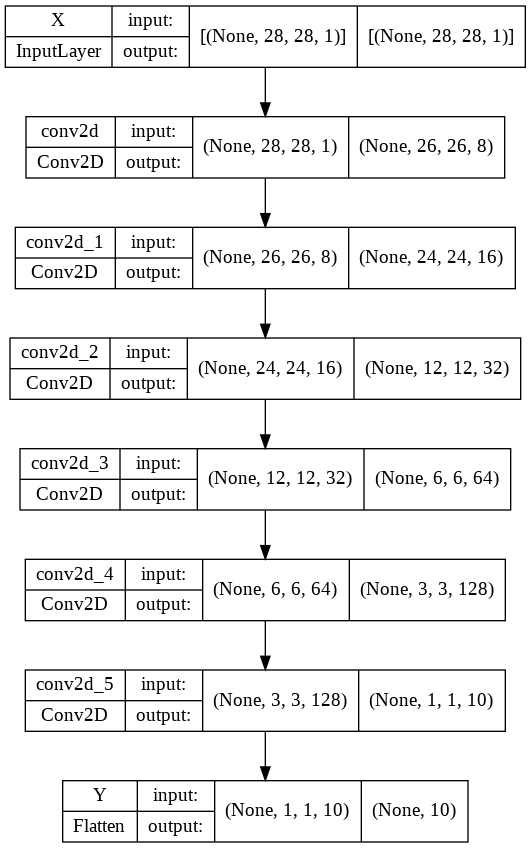

In [33]:
tf.keras.utils.plot_model(m, show_shapes = True)

In [34]:
m.compile(loss = tf.keras.losses.sparse_categorical_crossentropy, optimizer=tf.keras.optimizers.Adam())

In [35]:
m.fit(X_train,Y_train)

1875/1875 [==============================] - 69s 36ms/step - loss: 0.1469


In [36]:
m.summary()

Model: "conv_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 X (InputLayer)              [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 16)        1168      
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 6, 6, 64)          18496     
                                                                 
 conv2d_4 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 conv2d_5 (Conv2D)           (None, 1, 1, 10)          115

In [37]:
X_test,Y_test = process_input(test)

In [135]:
pred_test = m.predict(X_test[0:2000])

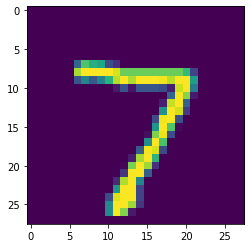

In [39]:
plt.imshow(X_test[0, ..., 0])

In [40]:
Y_test[0]

array([7])

In [41]:
pred_test

array([[2.76597323e-08, 1.31230081e-07, 8.46678449e-06, ...,
        9.98823583e-01, 1.41128481e-07, 3.48851927e-07],
       [1.09476368e-07, 1.01245914e-05, 9.99984980e-01, ...,
        4.08347358e-12, 3.47772357e-06, 3.04653058e-13],
       [4.39245525e-07, 9.99639750e-01, 3.91294307e-05, ...,
        9.28549198e-05, 1.37028881e-04, 4.76837249e-06],
       ...,
       [2.20838986e-10, 3.62588935e-07, 1.01815476e-06, ...,
        2.52520493e-09, 3.17403715e-06, 2.49385835e-07],
       [1.03292299e-08, 4.06755412e-08, 7.52151436e-07, ...,
        4.26751394e-05, 1.69732812e-05, 9.57674921e-01],
       [6.90964785e-10, 1.44029477e-09, 2.64003603e-07, ...,
        4.94679489e-06, 1.26355535e-05, 8.35421961e-04]], dtype=float32)

In [130]:
np.argmax(pred_test, axis = -1)
wynik_pred = np.argmax(pred_test, axis = -1)
wynik_pred = np.squeeze(wynik_pred)

In [131]:
pred_test[0,Y_test[0]]

array([0.98861], dtype=float32)

In [132]:
wynik_pred.shape

(2000,)

In [133]:
wynik_znany = Y_test[0:2000]
wynik_znany = np.squeeze(wynik_znany)

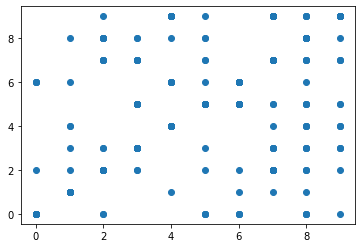

In [134]:
plt.scatter(wynik_znany, wynik_pred)

(array([[174.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.],
        [  0., 232.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   0.],
        [  0.,   0., 216.,   1.,   0.,   0.,   0.,   1.,   1.,   0.],
        [  0.,   0.,   0., 206.,   0.,   0.,   0.,   1.,   0.,   0.],
        [  1.,   0.,   1.,   0., 212.,   0.,   1.,   0.,   0.,   2.],
        [  0.,   0.,   0.,   3.,   0., 175.,   0.,   0.,   1.,   0.],
        [  2.,   1.,   0.,   0.,   0.,   1., 173.,   0.,   1.,   0.],
        [  0.,   1.,   2.,   2.,   0.,   0.,   0., 199.,   0.,   1.],
        [  0.,   0.,   2.,   1.,   0.,   0.,   0.,   0., 188.,   1.],
        [  0.,   0.,   0.,   2.,   3.,   1.,   0.,   0.,   1., 187.]]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <matplotlib.collections.QuadMesh at 0x7fc669114510>)

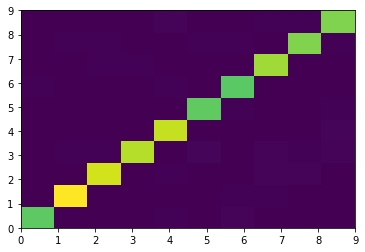

In [47]:
plt.hist2d(wynik_znany, wynik_pred)

In [109]:
def make_network(weight_regularizer=None, dropout_rate=0.0, classes=100, last_activation="softmax"):
  i = tf.keras.layers.Input(shape=[28, 28, 1], dtype=tf.float32, name="X")
  c1 = tf.keras.layers.Conv2D(filters=16, kernel_size=[3, 3], kernel_regularizer=weight_regularizer, activation="relu", padding="valid")(i)
  c2 = tf.keras.layers.Conv2D(filters=32, kernel_size=[3, 3], kernel_regularizer=weight_regularizer, activation="relu", padding="valid")(c1)
  c3 = tf.keras.layers.Conv2D(filters=64, kernel_size=[3, 3], kernel_regularizer=weight_regularizer, activation="relu", padding="valid")(c2)
  b1 = tf.keras.layers.BatchNormalization()(c3)
  m1 = tf.keras.layers.MaxPool2D()(b1)
  cc2 = tf.keras.layers.Conv2D(
      filters=64, 
      kernel_size=[2, 2], 
      kernel_regularizer=weight_regularizer, 
      activation="relu", 
      strides=(2,2), 
      padding="valid"
  )(b1)
  con1 = tf.keras.layers.Add()([m1, cc2])
  fl1 = tf.keras.layers.Flatten()(con1)
  d1 = tf.keras.layers.Dense(units=64, activation="tanh")(fl1)
  drop1 = tf.keras.layers.Dropout(rate=dropout_rate)(d1)
  d2 = tf.keras.layers.Dense(units=classes, activation=last_activation, name="y")(drop1)
  return tf.keras.Model(i, d2)

In [110]:
m1 = make_network(dropout_rate=0.2)

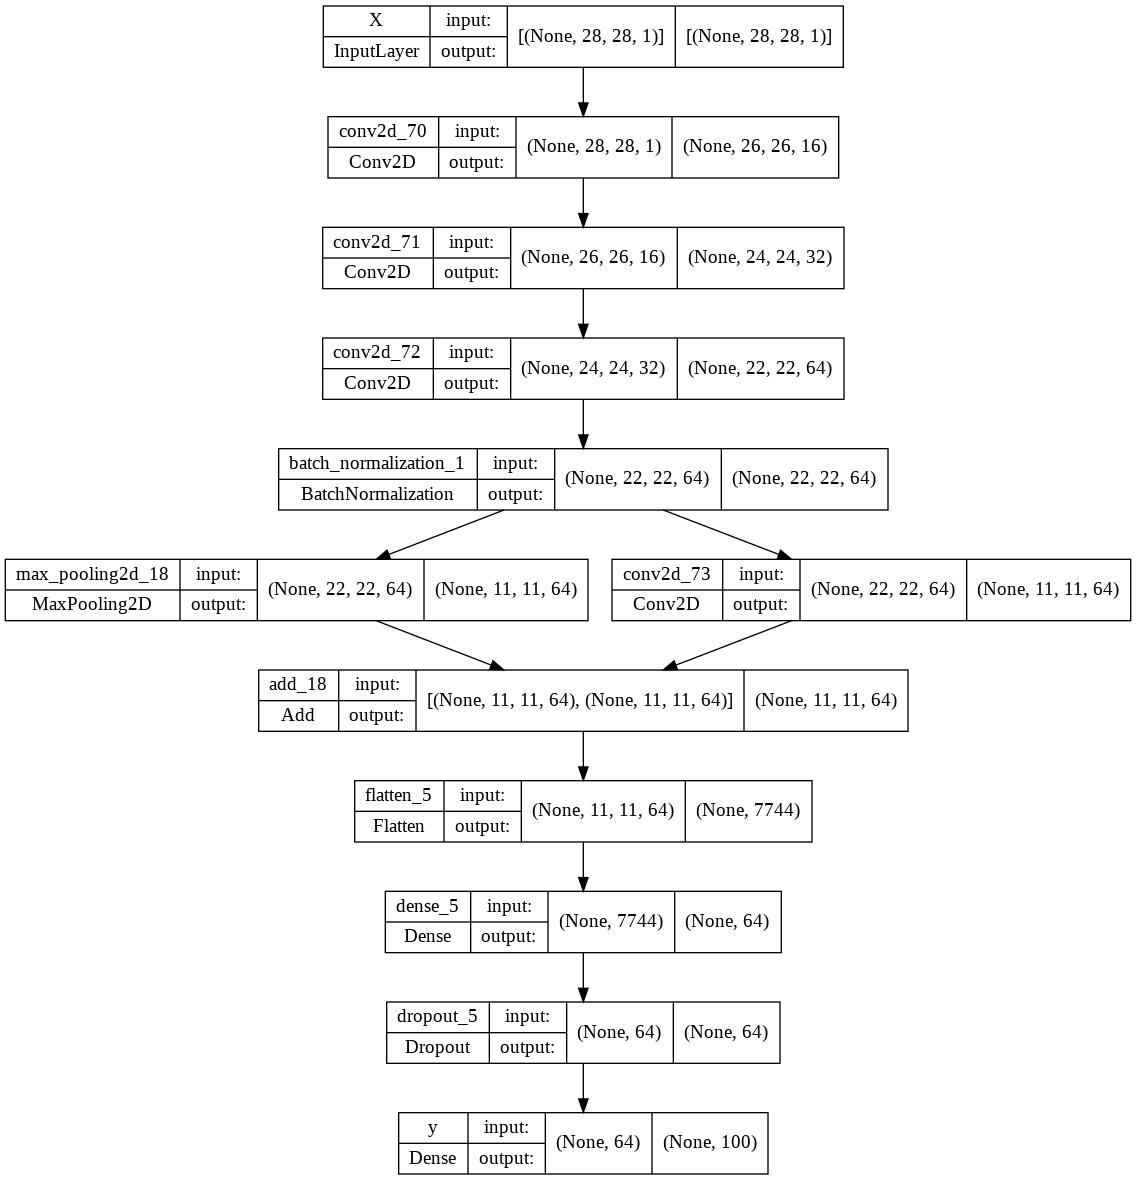

In [111]:
tf.keras.utils.plot_model(m1, show_shapes=True)

In [113]:
m1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001)) #okreslenie logits #okreslenie learning rate 
training1 = m1.fit(X_train[:800], Y_train[:800], batch_size=16, epochs = 20, validation_data=(X_test[:200], Y_test[:200])) #okreslenie epok

Epoch 1/20
50/50 [==============================] - 4s 65ms/step - loss: 0.3910 - val_loss: 0.8208
Epoch 2/20
50/50 [==============================] - 3s 65ms/step - loss: 0.3066 - val_loss: 0.6002
Epoch 3/20
50/50 [==============================] - 3s 64ms/step - loss: 0.2433 - val_loss: 0.4812
Epoch 4/20
50/50 [==============================] - 3s 62ms/step - loss: 0.2054 - val_loss: 0.3809
Epoch 5/20
50/50 [==============================] - 3s 63ms/step - loss: 0.1708 - val_loss: 0.3302
Epoch 6/20
50/50 [==============================] - 4s 72ms/step - loss: 0.1482 - val_loss: 0.2829
Epoch 7/20
50/50 [==============================] - 4s 75ms/step - loss: 0.1247 - val_loss: 0.2700
Epoch 8/20
50/50 [==============================] - 3s 63ms/step - loss: 0.1104 - val_loss: 0.2444
Epoch 9/20
50/50 [==============================] - 3s 63ms/step - loss: 0.0940 - val_loss: 0.2309
Epoch 10/20
50/50 [==============================] - 3s 63ms/step - loss: 0.0868 - val_loss: 0.2158
Epoch 11/

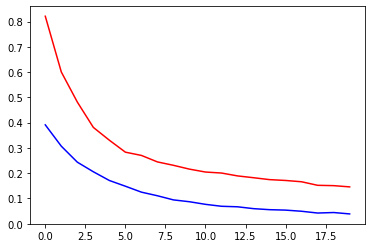

In [114]:
plt.plot(training1.history['loss'],c="b")
plt.plot(training1.history['val_loss'], c="r") #sieć jest przeuczona

In [124]:
pred_test1 = m1.predict(X_test[0:2000])

In [125]:
np.argmax(pred_test1, axis = -1)
wynik_pred1 = np.argmax(pred_test1, axis = -1)
wynik_pred1 = np.squeeze(wynik_pred1)

In [126]:
pred_test[0,Y_test[0]]

array([0.98861], dtype=float32)

In [127]:
wynik_znany1 = Y_test[0:2000]
wynik_znany1 = np.squeeze(wynik_znany1)

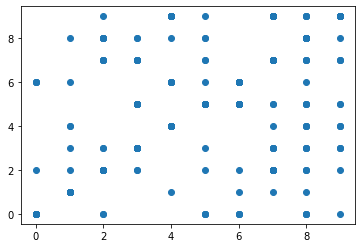

In [128]:
plt.scatter(wynik_znany1, wynik_pred1)

(array([[170.,   0.,   1.,   0.,   0.,   0.,   4.,   0.,   0.,   0.],
        [  0., 228.,   1.,   1.,   2.,   0.,   1.,   0.,   1.,   0.],
        [  2.,   0., 203.,   2.,   0.,   0.,   0.,   5.,   6.,   1.],
        [  0.,   0.,   2., 189.,   0.,   8.,   0.,   6.,   2.,   0.],
        [  0.,   1.,   0.,   0., 196.,   0.,   6.,   0.,   1.,  13.],
        [  4.,   0.,   1.,   1.,   0., 167.,   1.,   2.,   2.,   1.],
        [  4.,   1.,   1.,   0.,   0.,  10., 162.,   0.,   0.,   0.],
        [  0.,   1.,   8.,   5.,   1.,   2.,   0., 178.,   0.,  10.],
        [  4.,   1.,   3.,   4.,   4.,   4.,   1.,   4., 163.,   4.],
        [  1.,   0.,   1.,   3.,   3.,   2.,   0.,   3.,   1., 180.]]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <matplotlib.collections.QuadMesh at 0x7fc6634f2a90>)

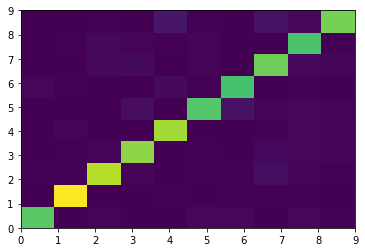

In [129]:
plt.hist2d(wynik_znany1, wynik_pred1)

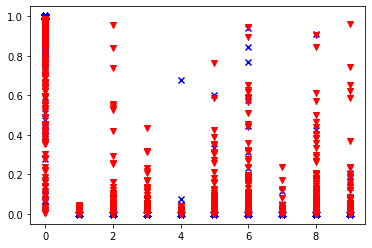

In [121]:
plt.scatter(Y_test[:, 0], m(X_test)[:, 0], c = "b", marker = "x")
plt.scatter(Y_test[:, 0], m1(X_test)[:, 0], c = "r", marker = "v")

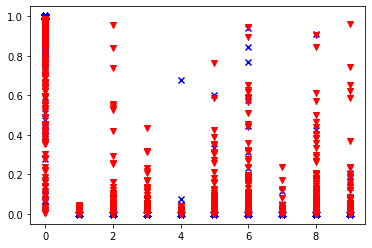

In [122]:
plt.scatter(Y_test[:, 0], m(X_test)[:, 0], c = "b", marker = "x")
plt.scatter(Y_test[:, 0], m1(X_test)[:, 0], c = "r", marker = "v")

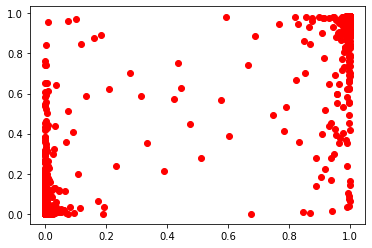

In [123]:
plt.scatter(m(X_test)[:, 0], m1(X_test)[:, 0], c="r")

In [136]:
pred_test[0,Y_test[0]]

array([0.9988236], dtype=float32)

In [137]:
pred_test1[0,Y_test[0]]

array([0.98861], dtype=float32)

In [138]:
pred_test[0,Y_test[0]]-pred_test1[0,Y_test[0]]

array([0.01021355], dtype=float32)